### Parts of this code taken and modified from:  
Location: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py  
Code source: Gaël Varoquaux  
              Andreas Müller  
Modified for documentation by Jaques Grobler  
License: BSD 3 clause  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Lets evaluate the Linear SVM, RBF SVM, and K-nn on synthetic data sets
Observe how easy it is to use different classifiers with the same code because of the framework the ```sklearn``` library uses to impement these classification algorithms. 

### Generate fake data to test the classifiers

In [2]:

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]


### Visualize Our Fake Data

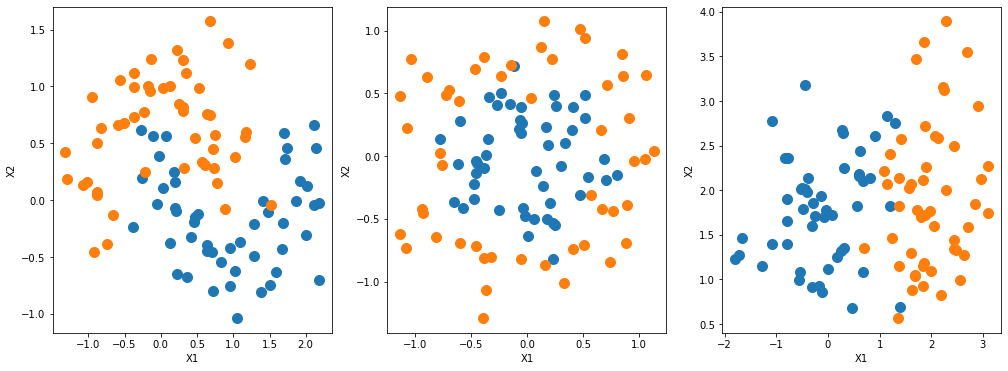

In [3]:
fig,ax = plt.subplots(1,3,figsize=(17,6))
for ii,ds in enumerate(datasets):
    X, y = ds
    ax[ii].scatter(X[y.astype(bool),0],X[y.astype(bool),1],s=100)
    ax[ii].scatter(X[~y.astype(bool),0],X[~y.astype(bool),1],s=100)
    ax[ii].set_xlabel('X1')
    ax[ii].set_ylabel('X2')

###  Visualize Z-score normalization of the data

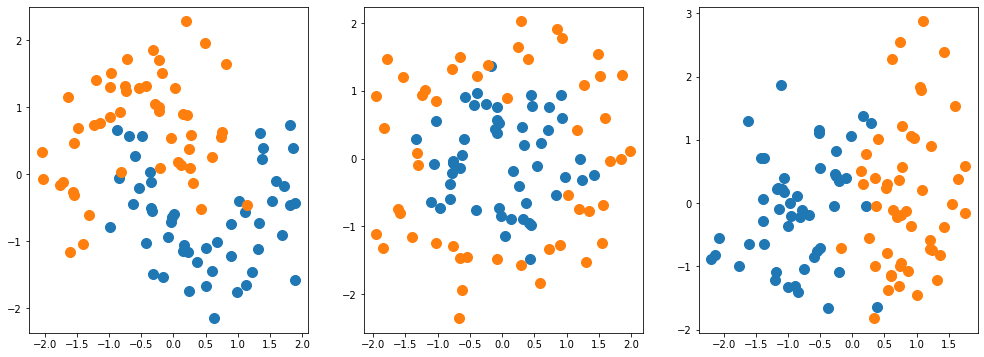

In [4]:
fig,ax = plt.subplots(1,3,figsize=(17,6))
for ii,ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    ax[ii].scatter(X[y.astype(bool),0],X[y.astype(bool),1],s=100)
    ax[ii].scatter(X[~y.astype(bool),0],X[~y.astype(bool),1],s=100)

### Split data into test and train sets

In [20]:
X,y = datasets[2]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)  

### Lets test a classifier

In [21]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1)
    ]

clf_num = 1
clf = classifiers[clf_num]
clf.fit(X_train,y_train)

score_train = clf.score(X_train,y_train) * 100
score_test = clf.score(X_test,y_test) * 100

print('The ' + names[clf_num] + ' algorithm had a test accuracy of ' + str(round(score_test*10)/10) + '% and a Training accuracy of ' + str(round(score_train*10)/10) + '%')

The Linear SVM algorithm had a test accuracy of 92.5% and a Training accuracy of 93.3%


In [22]:
#Functions from last time to visualize classifier boundaries
def make_meshgrid(X, ngrid=100, slack=0.2):
    if len(X.shape) > 2:
        warnings.warn('Grid visualization only work for 2D or less!')
    xmin, xmax = X[:, 0].min(),  X[:, 0].max()
    ymin, ymax = X[:, 1].min(),  X[:, 1].max()
    
    # Apply some slack so points are are not near the edge
    xmin *= 1 - np.sign(xmin) * slack
    xmax *= 1 + np.sign(xmax) * slack
    ymin *= 1 - np.sign(ymin) * slack
    ymax *= 1 + np.sign(ymax) * slack
    
    dx = (xmax - xmin) / ngrid
    dy = (ymax - ymin) / ngrid
    x = np.arange(xmin, xmax, dx)
    y = np.arange(ymin, ymax, dy)
    xx, yy = np.meshgrid(x, y)
    return (xx, yy)


def plot_decision(xx, yy, clf, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

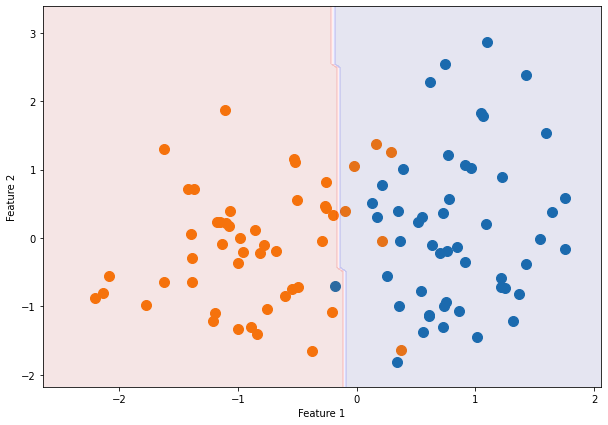

In [23]:
y_predicted_train = clf.predict(X_train)
y_predicted_test = clf.predict(X_test)


xx,yy = make_meshgrid(X_train)
plt.figure(figsize=(10,7))
plt.scatter(X[y.astype(bool),0],X[y.astype(bool),1],s=100,color = 'Tab:orange')
plt.scatter(X[~y.astype(bool),0],X[~y.astype(bool),1],s=100, color='Tab:blue')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plot_decision(xx,yy,clf,cmap='seismic',alpha=0.1)


### Lets evaluate the algorithms all together

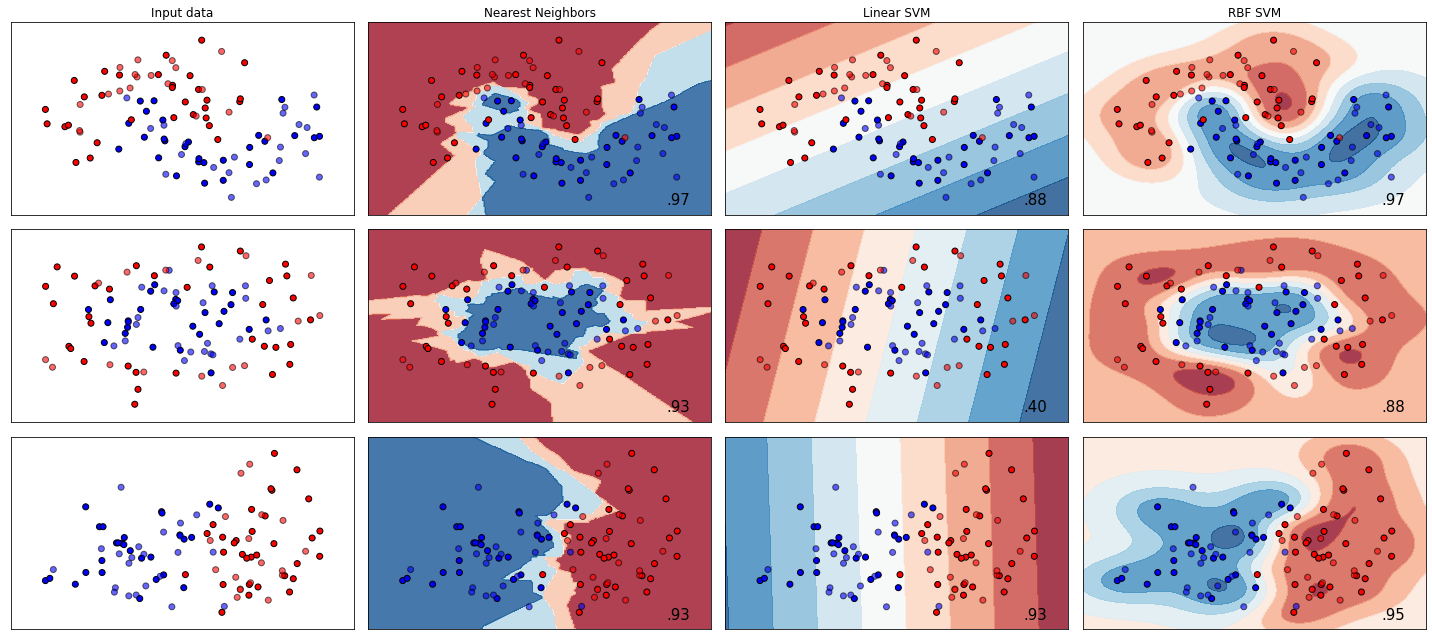

In [24]:
from matplotlib.colors import ListedColormap
figure = plt.figure(figsize=(20, 9))
i = 1
h = .02  # step size in the mesh
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)   #Normalize Features
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)   #Split data into test and training sets

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()
